# Multi Linear Regression Assignment

### Problem Statement
                  A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
                    In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
                    They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
                  1- Which variables are significant in predicting the demand for shared bikes.
                  2-  How well those variables describe the bike demand
                  
                  Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Buisness Goal
                    We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

#### Importing Python Libraries

In [1]:
#numpy and pandas
import numpy as np 
import pandas as pd

#visualization tools
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

###  Reading & Understanding the data

In [3]:
# Importing The Data
bikes=pd.read_csv(r"C:\Users\lappy\Downloads\Machine Learning\Linear Regression Module\Multi Linear Regression\day.csv") #you have to upload the location where the dataset is placed  
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# How many types of each data type column exists and total memory usage
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# shape of the dataframe
bikes.shape

(730, 16)

In [6]:
#Checking the numerical columns data distribution statistics
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Quality Check 

#### __As From Info and Shape itself We can see there are No Missing Values in the Dataset .We are Fine to go__

#### Duplicate Check

In [7]:
# Creating a copy of original dataframe for duplicate check
bikes_dup = bikes

# Checking for duplicates and dropping the entire duplicate row if any
bikes_dup.drop_duplicates(subset=None, inplace=True)
bikes_dup.shape

(730, 16)

#### __Shape Of Dataframe even after dropping Duplicates is same so we can assure there is no duplicates in the dataset__

__Dropping Unnecessary Column:__

-  __Instant:__ It is only an index value
-  __dteday:__ This has the date, Since we already have separate columns for 'year' & 'month' we an avoid this Column__
-  __casual & registered:__ Both these columns contains the count of bike booked by different categories of customers and we also know that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.__
-  __atemp:__ temp column is enough for us beacause they both are almost reflecting the same data so we can drop this__

In [8]:
#Rename the columns for better understanding
bikes.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#drop unnecessary columns
bikes=bikes.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


#### __Encoding Categorical Values__

In [10]:
#Encoding Season
bikes.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

#Encoding Months
bikes.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

#Encoding Weather sit
bikes.weathersit.replace((1,2,3,4), ('Clear','Mist','Light_snow','Heavy_rain'), inplace=True)

#Encoding weekday
bikes.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [11]:
#Looking Datframe after Encoding
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,Spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### Data Visualizaion

__To Understand the Correlation Between Variables__

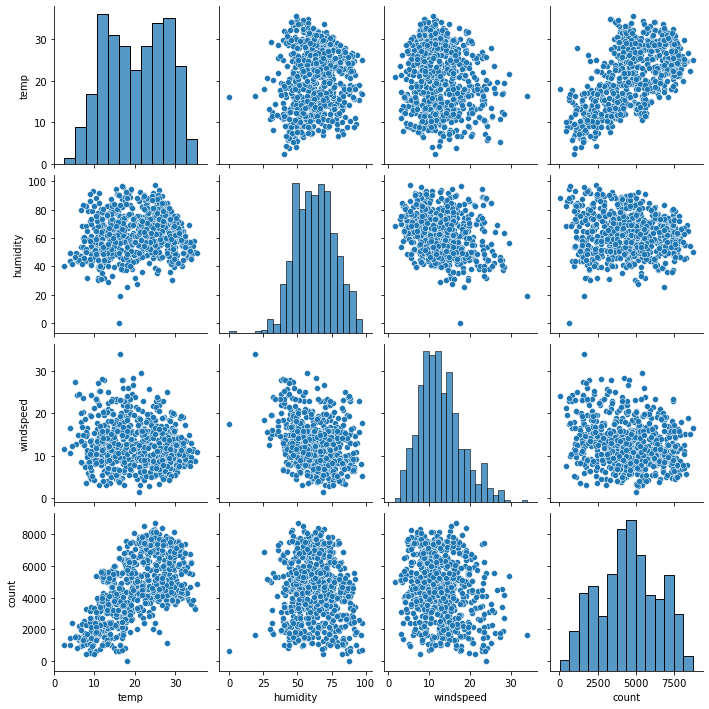

In [12]:
#Pairplot for numeric variables
sns.pairplot(bikes, vars=['temp','humidity','windspeed','count'])
plt.show()

__Insgiht: From the pairplot We ca see temp is Highly Correlated with target Variable as temp increases bike count also increases__ 

### Categorical Variable Analysis

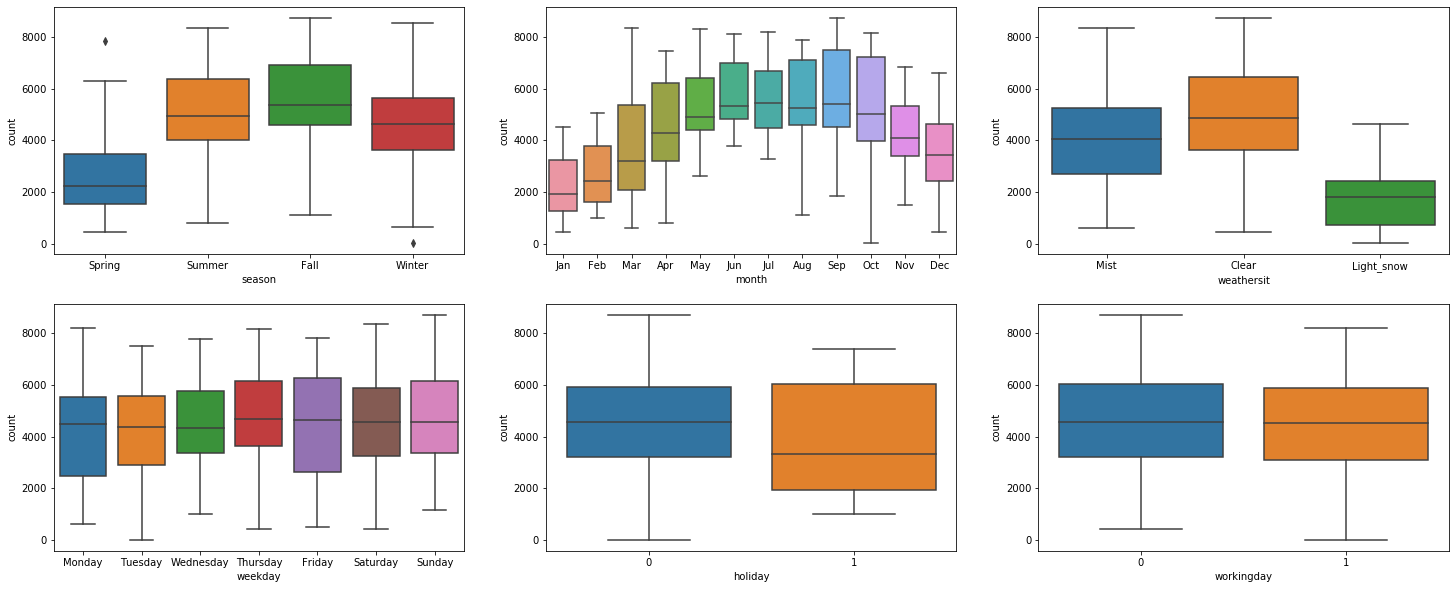

In [13]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'count', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'count', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'count', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bikes)
plt.show()

__Insights__: __The plots above shows the relationship between categorical variables and a Target variable.__
- __Bike Rentals are more during the Fall Followed by Summer__
- __Bike Rentals are more in Clear weather__

__Year__
-  __0-2018__
-  __1-2019__

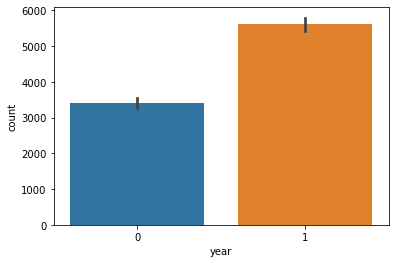

In [14]:
#Relation between Year and count of bike rentals
sns.barplot('year','count',data=bikes)
plt.show()

__Insights: As the Graph tells rental count is almost Doubled in 2019__

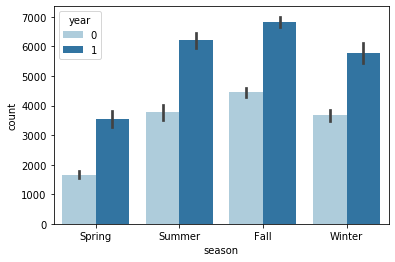

In [15]:
#Relation between season and count of bike rentals
sns.barplot('season','count',data=bikes,hue='year',palette='Paired')
plt.show()

__Insights: Almost 32% of the bike booking were happening in Fall. It is followed by Summer & Winter with 27% & 25% of total booking. It indicates that the season can be a good predictor of the dependent variable__

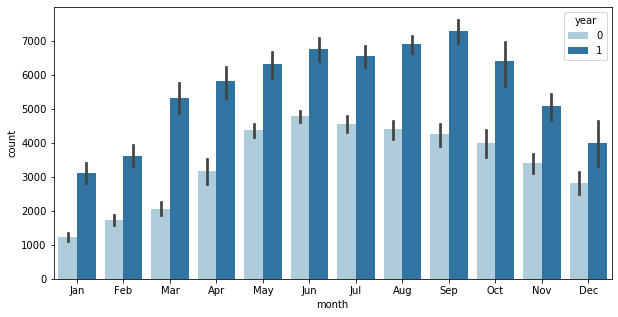

In [16]:
#Relation between month and count of bike rentals
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bikes,palette='Paired')
plt.show()

__Insights: Almost 10% of the bike booking was happening in the months' May to Sep with a median of over 4000 bookings per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.__

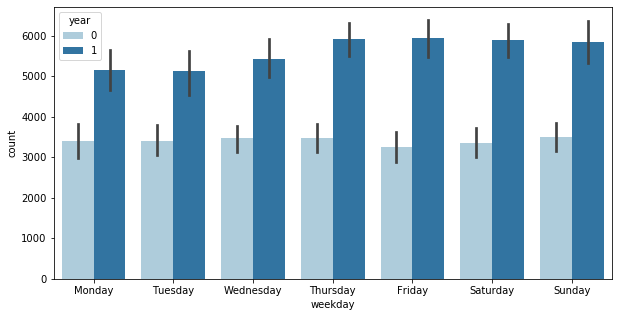

In [17]:
#Relation between weekday and count of bike rentals
plt.figure(figsize=(10,5))
sns.barplot('weekday','count',hue='year',data=bikes,palette='Paired')
plt.show()

__Insights: Weekday variable shows the very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection__

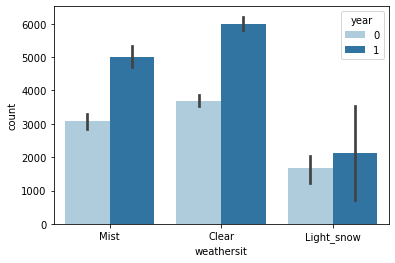

In [18]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',data=bikes,hue='year',palette='Paired')
plt.show()

__Insights: Almost 68% of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Mist with 30% of the total booking. It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable__

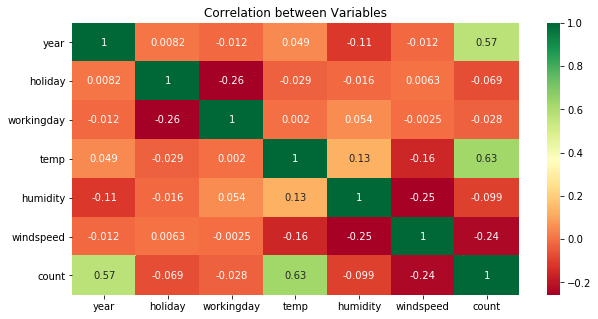

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(bikes.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

__Insights:__ Temp and year variable are correlated to count of bikes

### Data Preperation

#### Creating Dummy Variables

In [20]:
#Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column as its of no use

months=pd.get_dummies(bikes.month,drop_first=True)

weekdays=pd.get_dummies(bikes.weekday,drop_first=True)

weather_sit=pd.get_dummies(bikes.weathersit,drop_first=True)

seasons=pd.get_dummies(bikes.season,drop_first=True)

In [21]:
# Inspecting data after dummy creation

print(months.head(3))
print(weekdays.head(3))
print(weather_sit.head(2))
print(seasons.head(3))

   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       1         0       0         0        0          0
1       0         0       0         0        1          0
2       0         0       0         0        0          1
   Light_snow  Mist
0           0     1
1           0     1
   Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0


In [22]:
# Add the results to the original bike dataframe
bikes=pd.concat([months,weekdays,weather_sit,seasons,bikes],axis=1)
bikes.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         730 non-null    uint8  
 1   Dec         730 non-null    uint8  
 2   Feb         730 non-null    uint8  
 3   Jan         730 non-null    uint8  
 4   Jul         730 non-null    uint8  
 5   Jun         730 non-null    uint8  
 6   Mar         730 non-null    uint8  
 7   May         730 non-null    uint8  
 8   Nov         730 non-null    uint8  
 9   Oct         730 non-null    uint8  
 10  Sep         730 non-null    uint8  
 11  Monday      730 non-null    uint8  
 12  Saturday    730 non-null    uint8  
 13  Sunday      730 non-null    uint8  
 14  Thursday    730 non-null    uint8  
 15  Tuesday     730 non-null    uint8  
 16  Wednesday   730 non-null    uint8  
 17  Light_snow  730 non-null    uint8  
 18  Mist        730 non-null    uint8  
 19  Spring      730 non-null    u

In [24]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bikes.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bikes.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [25]:
#shape of dataframe
bikes.shape

(730, 29)

### Splitting the data into Train & Test Dataset

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [27]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


__Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset__

In [28]:
bike_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,20.108257,63.123710,12.834912,4485.337255
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,7.431626,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000


###  Rescalling bike_train dataframe

In [29]:
#import the library
from sklearn.preprocessing import MinMaxScaler

# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [30]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [31]:
bike_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__Checking Correlation Coeffecient__

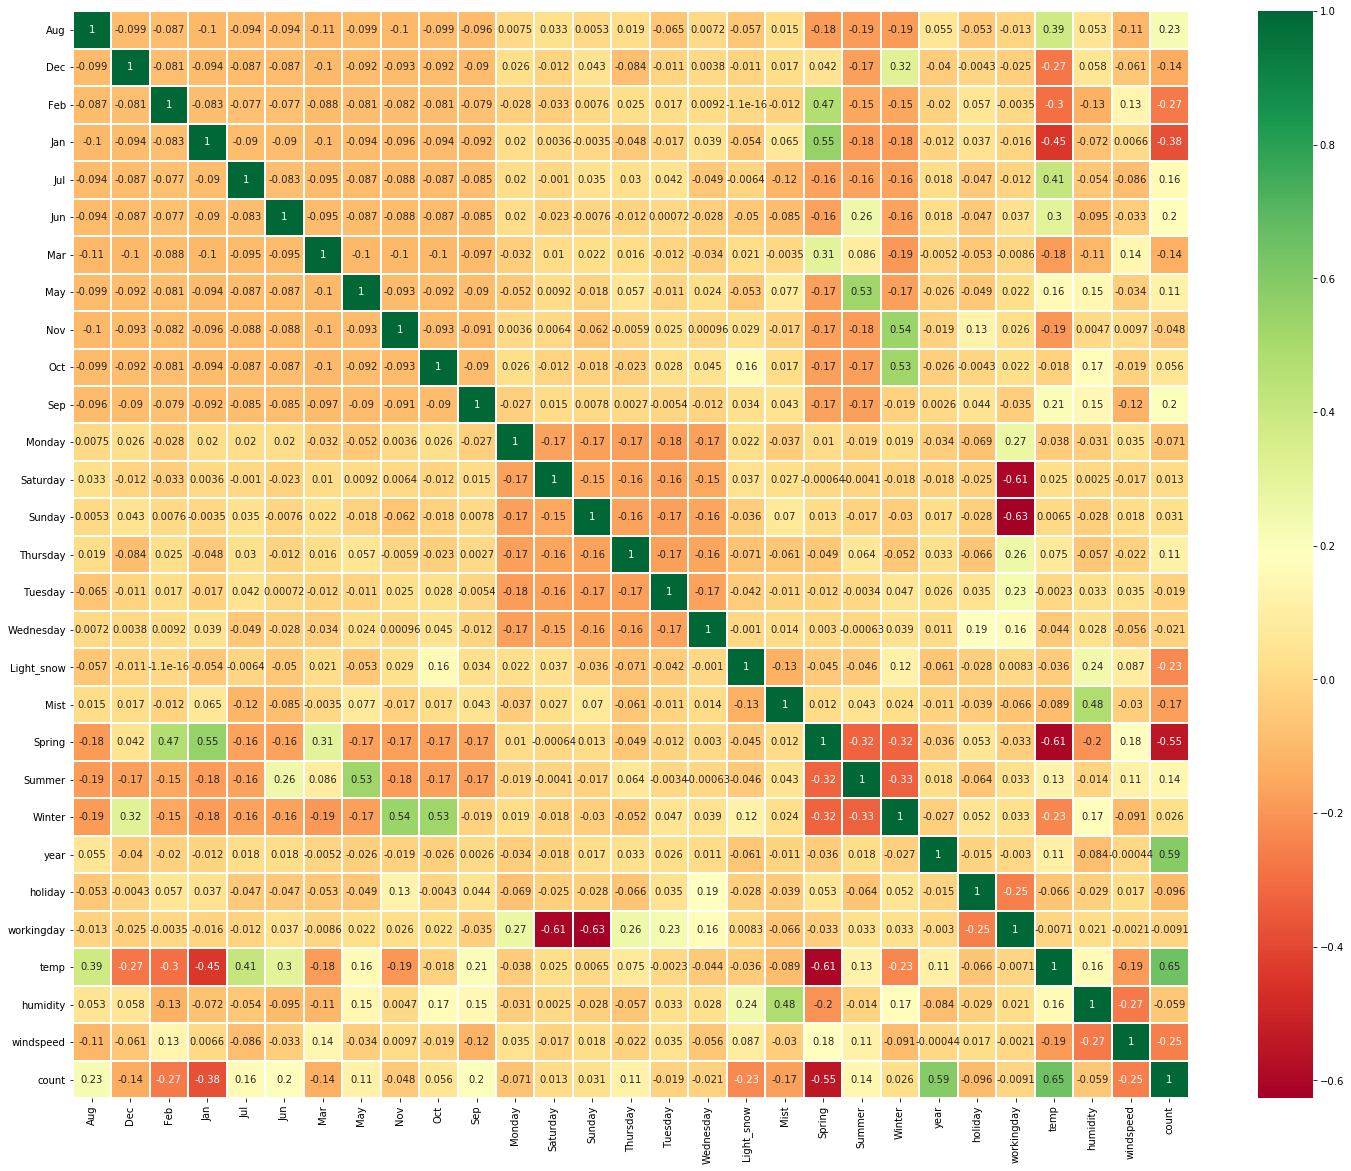

In [32]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

__Insights:__

-  __workingday variable has high negative correlation with Sat & Sun (where workingday =0)__
-  __Spring is negatively correlated with cnt__
-  __misty weather and humidity has correlation__
-  __various months and corresponding weather has correlation__

### Building the Linear Model

__Dividing into X_train and y_train__

In [33]:
y_train = bike_train.pop('count')
X_train = bike_train

__RFE:- 
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE__

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light_snow', True, 1),
 ('Mist', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [37]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_snow', 'Mist', 'Spring',
       'Summer', 'Winter', 'year', 'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [38]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'workingday'],
      dtype='object')

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

__Manual Model Development using statsmodel__

__Model:- 1__

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        14:00:19   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

__Function for VIF Calculation__

In [41]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [42]:
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,Spring,4.37
9,Winter,4.06
8,Summer,2.82
6,Mist,2.32
10,year,2.09
3,Nov,1.85
1,Jan,1.75


__Insight: As You can see humidity has a huge VIF value We will go ahead with dropping it from the equation__

In [43]:
X_train_new = X_train_new.drop(['humidity'], axis = 1)

__Model:- 2__

In [44]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)


lr1 = sm.OLS(y_train, X_train_lm1).fit()


print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.75e-186
Time:                        14:00:19   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [45]:
calculateVIF(X_train_lm1)

,Features,VIF
0,const,63.35
8,Spring,5.21
13,temp,4.10
10,Winter,3.68
9,Summer,2.74
4,Nov,1.77
2,Jan,1.67
1,Dec,1.49
3,Jul,1.48
5,Sep,1.33


__Insights: As From Stats we can see Nov variable has a -ve corr also its p value is not that much reliable We will go ahead with dropping it from the equation__

In [46]:
X_train_lm1 = X_train_lm1.drop(['Nov'], axis = 1)

__Model:- 3__

In [47]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_lm1)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.74e-186
Time:                        14:00:19   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

In [48]:
calculateVIF(X_train_lm2)

,Features,VIF
0,const,59.31
7,Spring,5.04
12,temp,3.83
9,Winter,3.44
8,Summer,2.66
2,Jan,1.64
3,Jul,1.48
4,Sep,1.29
1,Dec,1.25
13,windspeed,1.12


__Insights: As From Stats we can see Dec variable has a high p value which reflects its not that much signifucant also it is-ve corr So We will go ahead with dropping it from the equation__

In [49]:
X_train_lm2 = X_train_lm2.drop(['Dec'], axis = 1)

__Model:- 4__

In [50]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_lm2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.14e-187
Time:                        14:00:20   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [51]:

calculateVIF(X_train_lm3)

,Features,VIF
0,const,55.94
6,Spring,5.03
11,temp,3.62
8,Winter,3.43
7,Summer,2.62
1,Jan,1.56
2,Jul,1.48
3,Sep,1.29
12,windspeed,1.11
4,Light_snow,1.05


__Insights: As From Stats we can see Jan variable has a -ve corr also its p value is not that much reliable We will go ahead with dropping it from the equation__

In [52]:
X_train_lm3 = X_train_lm3.drop(['Jan'], axis=1)

__Model:- 5__

In [53]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_lm3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.06e-187
Time:                        14:00:20   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [54]:
calculateVIF(X_train_lm4)

,Features,VIF
0,const,52.57
5,Spring,4.95
10,temp,3.38
7,Winter,3.34
6,Summer,2.60
1,Jul,1.48
2,Sep,1.29
11,windspeed,1.09
3,Light_snow,1.05
4,Mist,1.04


__Insights: As From Stats we can see Windspeed variable has a -ve corr so We will go ahead with dropping it from the equation__

In [55]:
X_train_lm4 = X_train_lm4.drop(['windspeed'], axis=1)

__Model:- 6__

In [56]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_lm4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.71e-181
Time:                        14:00:21   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1501      0.029      5.124      0.0

In [57]:
calculateVIF(X_train_lm5)

,Features,VIF
0,const,48.34
5,Spring,4.93
10,temp,3.37
7,Winter,3.34
6,Summer,2.57
1,Jul,1.48
2,Sep,1.28
3,Light_snow,1.04
4,Mist,1.04
8,year,1.02


In [58]:
# Checking the parameters obtained
print(lr5.params)

const         0.150081
Jul          -0.052338
Sep           0.081182
Light_snow   -0.298944
Mist         -0.078458
Spring       -0.076589
Summer        0.036651
Winter        0.082879
year          0.232598
holiday      -0.100259
temp          0.502913
dtype: float64


__Insight:__
        __This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.__

### Residual Analysis

__So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.__

In [59]:
#y train prediction
y_train_pred = lr5.predict(X_train_lm5)

In [60]:
#calculating Residual
residual = y_train - y_train_pred

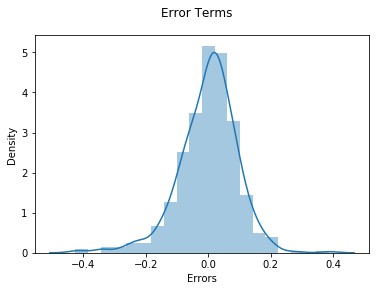

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

__Insight: Based on the histogram, we can conclude that error terms are following a normal distribution__

### Making Predictions using final model

#### Scaling bike_test dataframe

_Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset._

In [62]:
num_vars = ['temp','humidity', 'windspeed','count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [63]:
bike_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


__Dividing X_test and y_test__

In [64]:
y_test = bike_test.pop('count')
X_test = bike_test

In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         220 non-null    uint8  
 1   Dec         220 non-null    uint8  
 2   Feb         220 non-null    uint8  
 3   Jan         220 non-null    uint8  
 4   Jul         220 non-null    uint8  
 5   Jun         220 non-null    uint8  
 6   Mar         220 non-null    uint8  
 7   May         220 non-null    uint8  
 8   Nov         220 non-null    uint8  
 9   Oct         220 non-null    uint8  
 10  Sep         220 non-null    uint8  
 11  Monday      220 non-null    uint8  
 12  Saturday    220 non-null    uint8  
 13  Sunday      220 non-null    uint8  
 14  Thursday    220 non-null    uint8  
 15  Tuesday     220 non-null    uint8  
 16  Wednesday   220 non-null    uint8  
 17  Light_snow  220 non-null    uint8  
 18  Mist        220 non-null    uint8  
 19  Spring      220 non-null   

In [66]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#Selecting the variables that were part of final model.
X_test_lm6=X_test[X_train_lm5.columns]


X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   Jul         220 non-null    uint8  
 2   Sep         220 non-null    uint8  
 3   Light_snow  220 non-null    uint8  
 4   Mist        220 non-null    uint8  
 5   Spring      220 non-null    uint8  
 6   Summer      220 non-null    uint8  
 7   Winter      220 non-null    uint8  
 8   year        220 non-null    int64  
 9   holiday     220 non-null    int64  
 10  temp        220 non-null    float64
dtypes: float64(2), int64(2), uint8(7)
memory usage: 10.1 KB


In [67]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm6)

### Data Validation

#### Homoscedasticity

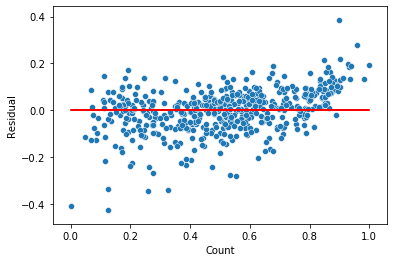

In [68]:
#checking homoscedacity is well preserved or not

sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

__Insight: There is no visible pattern in residual values, thus homoscedacity is well preserved__

__Absence of Multicolinearity__

In [69]:
calculateVIF(X_train_lm5)

,Features,VIF
0,const,48.34
5,Spring,4.93
10,temp,3.37
7,Winter,3.34
6,Summer,2.57
1,Jul,1.48
2,Sep,1.28
3,Light_snow,1.04
4,Mist,1.04
8,year,1.02


__Insight: All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.(Const is not a predictor so we are good to go)__

### Model Evaluation

Text(0, 0.5, 'y_pred')

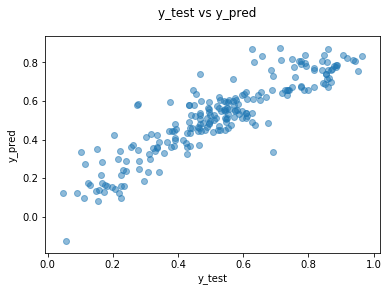

In [70]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

#### R^2 Value Calculation for bike_test dataframe 

In [71]:
from sklearn.metrics import r2_score

r2 = round(r2_score(y_test, y_pred),4)
r2

0.8093

#### Adjusted R^2 Value Calculation for bike_test dataframe

In [72]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7802

__Insights:__

-  __R^2 Value          = 80%__
-  __Adjusted R^2 Value = 78%__

__It seems to be really a good model that can generalize various datasets.__

### Final Model Interpretation

__The equation of best fitted surface based on model lr5:__

__cnt = 0.1501+ (0.232598 x year) + (0.502913 x temp) + (0.081182 x Sep) + (0.036651 x Summer) + (0.082879 x Winter) - (0.052338  x Jul) - (0.076589 x Spring) - (0.100259 x Holiday) − (0.078458 x Mist) − (0.298944 x Light_snow)__

__Interpretation of coefficients:-__ 

-  __const :__ The Constant value of ‘0.1501’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.1501 units

-  __year :__ A coefficient value of ‘0.232598’ indicated that a unit increase in year variable, increases the bike hire numbers by 0.232598 units

-  __Sep :__ A coefficient value of ‘0.081182’ indicated that, in sep variable occurs the bike hire numbers by 0.081182 units

-  __temp :__ A coefficient value of ‘0.502913’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.502913 units(almost 50%)

-  __Jul:__ A coefficient value of ‘-0.052338’ indicated that, a unit increase in Jul variable decreases the bike hire numbers by 0.052338 units

-  __Summer:__ A coefficient value of ‘0.036651’ indicated that a unit increase in Summer variable increases the bike hire numbers by 0.036651 units

-  __Winter:__ A coefficient value of ‘0.082879’ indicated that a unit increase in Winter variable increases the bike hire numbers by 0.082879 units

-  __Spring:__ A coefficient value of ‘-0.076589’ indicated that a unit increase in Spring variable decreases the bike hire numbers by 0.076589 units

-  __Light_snow:__ A coefficient value of ‘-0.298944’ indicated that, a unit increase in light_snow variable, decreases the bike hire numbers by -0.298944 units

-  __Mist:__ A coefficient value of ‘-0.078458’ indicated that a unit increase in Mist weather variable, decreases the bike hire numbers by 0.078458 units

-  __Holiday:__ A coefficient value of ‘-0.100259’ indicated that a unit increase in Holiday variable decreases the bike hire numbers by 0.100259 units


__F-Statistics__

__F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is__

-  __F-Statistics :       233.3__
-  __Prob (F-statistic):  5.71e-181__

__Insight: The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant__

## Model Outcome Conclusion

__As per the final model, the top 3 predictor variables that influences bike booking are:__

__Temperature (Temp)__
- A coefficient value of ‘0.502913’ indicated that a temperature has significant impact on bike rentals

__Light Snow (weathersit =3)__
- A coefficient value of ‘-0.298944’ indicated that the light snow and rain neglects people from renting out bikes

__Year (yr)__
- A coefficient value of ‘0.232598’ indicated that a year wise the rental numbers are increasing

__Recommendations__

- __It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.__